# Python Plots

In [1]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
from matplotlib.ticker import FuncFormatter
import plotly
import plotly.figure_factory as ff
from pandas.plotting import parallel_coordinates
import numpy as np

%matplotlib inline

In [2]:
education = pd.read_csv('ex6-2/education.csv')
crime = pd.read_csv('ex6-2/crimeratesbystate-formatted.csv')
birthrate = pd.read_csv('ex6-2/birth-rate.csv')

# removing whitespaces
education = education.applymap(lambda x: x.strip() if type(x) is str else x)
crime = crime.applymap(lambda x: x.strip() if type(x) is str else x)
birthrate = birthrate.applymap(lambda x: x.strip() if type(x) is str else x)

## Python - Histogram

/Users/navavallepalli/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='BirthRate', ylabel='Density'>

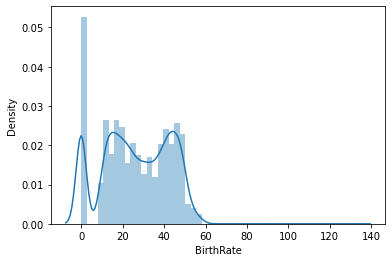

In [3]:
birthrate_hist = pd.melt(birthrate, id_vars="Country", var_name="Year", value_name = 'BirthRate').fillna(0)
birthrate_hist["BirthRate"] = birthrate_hist["BirthRate"].apply(lambda x: math.ceil(x))
sns.distplot( birthrate_hist["BirthRate"] )

## Python - Box plot

<AxesSubplot:xlabel='Country', ylabel='BirthRate'>

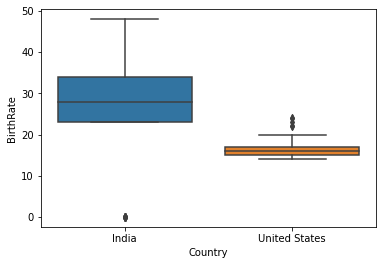

In [4]:
birthrate_box = birthrate_hist[(birthrate_hist["Country"]=="India") | (birthrate_hist["Country"]=="United States")]
sns.boxplot(x = birthrate_box["Country"], y=birthrate_box["BirthRate"])

## Python - Bullet chart

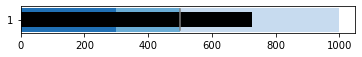

In [5]:
crime_bullet = crime[crime["state"]=="United States"][["state","burglary"]]
crime_bullet['target'] = 500
crime_bullet_tuple = [tuple(x) for x in crime_bullet.values][0]
crime_bullet_tuple

limits = [300, 500, 1000]
palette = sns.color_palette("Blues_r", len(limits))
fig, ax = plt.subplots()
ax.set_aspect('equal')
ax.set_yticks([1])

prev_limit = 0
for idx, lim in enumerate(limits):
    ax.barh([1], lim-prev_limit, left=prev_limit, height=75, color=palette[idx])
    prev_limit = lim
    
ax.barh([1], crime_bullet_tuple[1], color='black', height=45)

ax.axvline(crime_bullet_tuple[2], color="gray", ymin=0.10, ymax=0.9)

## Python - Pie chart

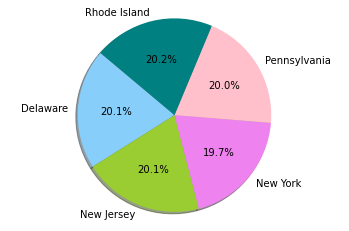

In [6]:
# Pie chart: Comparison of reading numbers between 5 states
education_parallel = education[education['state'].isin(['New York','New Jersey','Delaware','Rhode Island','Pennsylvania'])][['state','writing','reading','math']]
education_pie = education_parallel[['state','reading']]

# set colors
colors = ['lightskyblue', 'yellowgreen', 'violet', 'pink','teal']

# plot
plt.pie(education_pie['reading'], labels=education_pie['state'], colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.show()